In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('desafio_indicium_imdb.csv')
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
print("Formato do DataFrame:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

Formato do DataFrame: (999, 16)

Tipos de dados:
Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [ ]:
#Verificação de valores faltantes da tabela
nulos_por_coluna = df.isnull()
contagem_nulos = nulos_por_coluna.sum()
print("Contagem de valores nulos por coluna:")
print(contagem_nulos)

Contagem de valores nulos por coluna:
Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
# Conta o número de linhas que possuem pelo menos um valor faltante
linhas_com_faltantes = df.isnull().any(axis=1).sum()

print(f"Número de linhas com dados faltantes: {linhas_com_faltantes}")


Número de linhas com dados faltantes: 286


In [ ]:
#Separa a string "min" do valor
df['Runtime'] = df['Runtime'].str.replace(' min', '')
print(df['Runtime'].head())

0    175
1    152
2    202
3     96
4    201
Name: Runtime, dtype: object


In [ ]:
#Retira "," dos valores Gross, processo nescessario para transformação em numeros inteiros
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)


In [ ]:
# Converter as colunas para numérico, forçando erros a virarem NaN
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

print(df[['Runtime', 'Gross', 'Released_Year']].dtypes)
print(df[['Runtime', 'Gross', 'Released_Year']].head())

Runtime            int64
Gross            float64
Released_Year    float64
dtype: object
   Runtime        Gross  Released_Year
0      175  134966411.0         1972.0
1      152  534858444.0         2008.0
2      202   57300000.0         1974.0
3       96    4360000.0         1957.0
4      201  377845905.0         2003.0


In [ ]:
#Converter colunas para do tipo numérico(foi verificado )
#df[['Runtime', 'Gross','Released_Year']] = df[['Runtime', 'Gross','Released_Year']].astype('float64')
#print(df[['Runtime', 'Gross','Released_Year']].dtypes)
#print(df[['Runtime', 'Gross','Released_Year']].head())
#print("\nTipos de dados:")
#print(df.dtypes)

In [ ]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
colunas_numericasV1 = colunas_numericas.drop('Unnamed: 0')
print(colunas_numericasV1)

Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


In [ ]:
#Criando um db apenas com as colunas numericas
df_numerico = df[colunas_numericasV1]
print(df_numerico.head())

   Released_Year  Runtime  IMDB_Rating  Meta_score  No_of_Votes        Gross
0         1972.0      175          9.2       100.0      1620367  134966411.0
1         2008.0      152          9.0        84.0      2303232  534858444.0
2         1974.0      202          9.0        90.0      1129952   57300000.0
3         1957.0       96          9.0        96.0       689845    4360000.0
4         2003.0      201          8.9        94.0      1642758  377845905.0


In [ ]:
#Dropando valores faltantes do banco de dados numerico
bd_sem_nulos = df_numerico.dropna()

In [ ]:
#Verificação de valores faltantes da tabela
nulos_por_coluna = bd_sem_nulos.isnull()
contagem_nulos = nulos_por_coluna.sum()
print("Contagem de valores nulos por coluna:")
print(contagem_nulos)

Contagem de valores nulos por coluna:
Released_Year    0
Runtime          0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

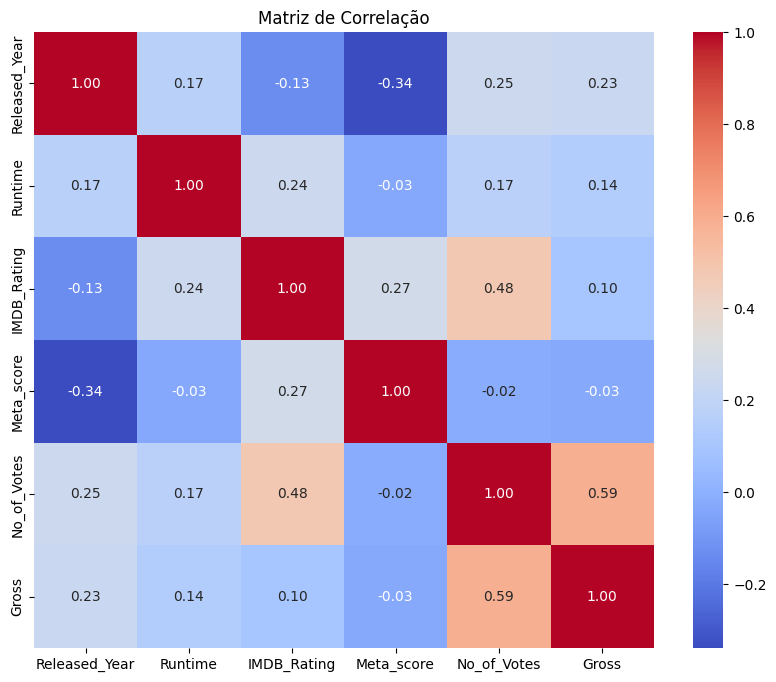

In [ ]:
#Gerando grafico de correlação entre as variaveis numerics
correlation_matrix = df_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt

Análise do No_of_Votes (Número de Votos)
Observa-se que o número de votos tem uma correlação positiva moderada com o faturamento (Gross) e com a nota do IMDb (IMDB_Rating).

Conclusão: Isso indica que popularidade, sucesso comercial e avaliação do público estão conectados. Filmes que arrecadam mais dinheiro tendem a ser mais vistos e, consequentemente, recebem mais votos. Da mesma forma, filmes com notas altas no IMDb geralmente são mais populares e atraem um público maior, que por sua vez gera mais votos.

A correlação fraca, mas positiva, com o ano de lançamento (Released_Year) sugere que filmes mais recentes tendem a acumular um número maior de votos, o que pode ser explicado pela crescente popularização das plataformas de avaliação online ao longo do tempo.

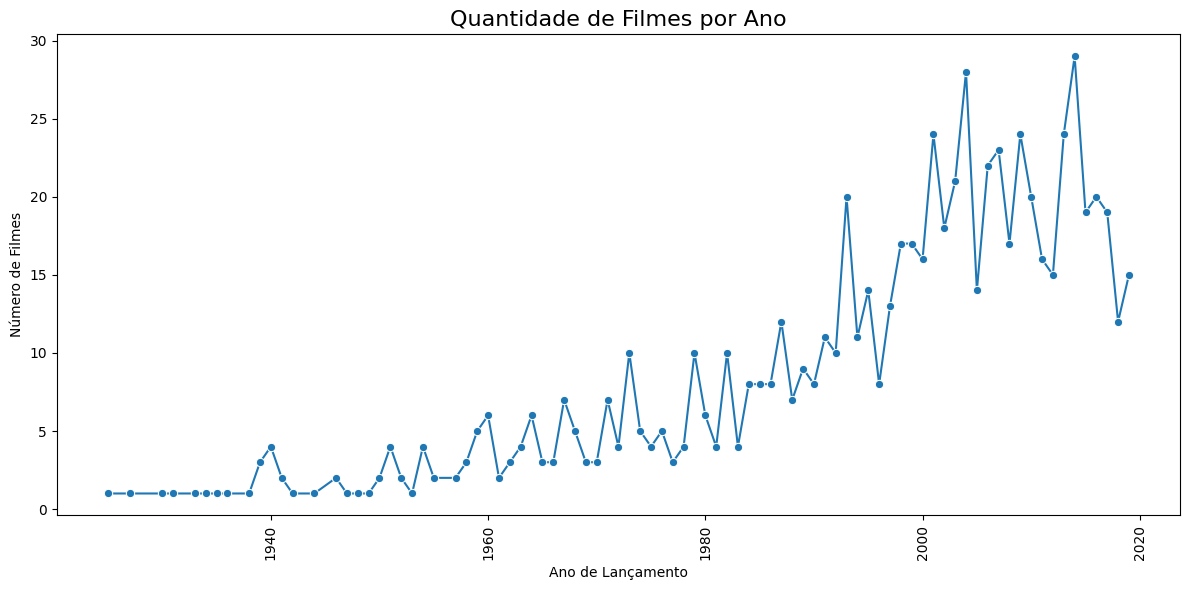

In [ ]:
df_Numerico = bd_sem_nulos

# Conta quantos filmes existem em cada ano
df_count_filmes = df_Numerico.groupby("Released_Year")["Gross"].count().reset_index()
df_count_filmes.rename(columns={"Gross": "Quantidade_Filmes"}, inplace=True)

# Plotando
plt.figure(figsize=(12,6))
sns.lineplot(data=df_count_filmes, x="Released_Year", y="Quantidade_Filmes", marker="o")

plt.title("Quantidade de Filmes por Ano", fontsize=16)
plt.xlabel("Ano de Lançamento")
plt.ylabel("Número de Filmes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2483445877.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top15_por_ano = df_Numerico.groupby("Released_Year", group_keys=False).apply(


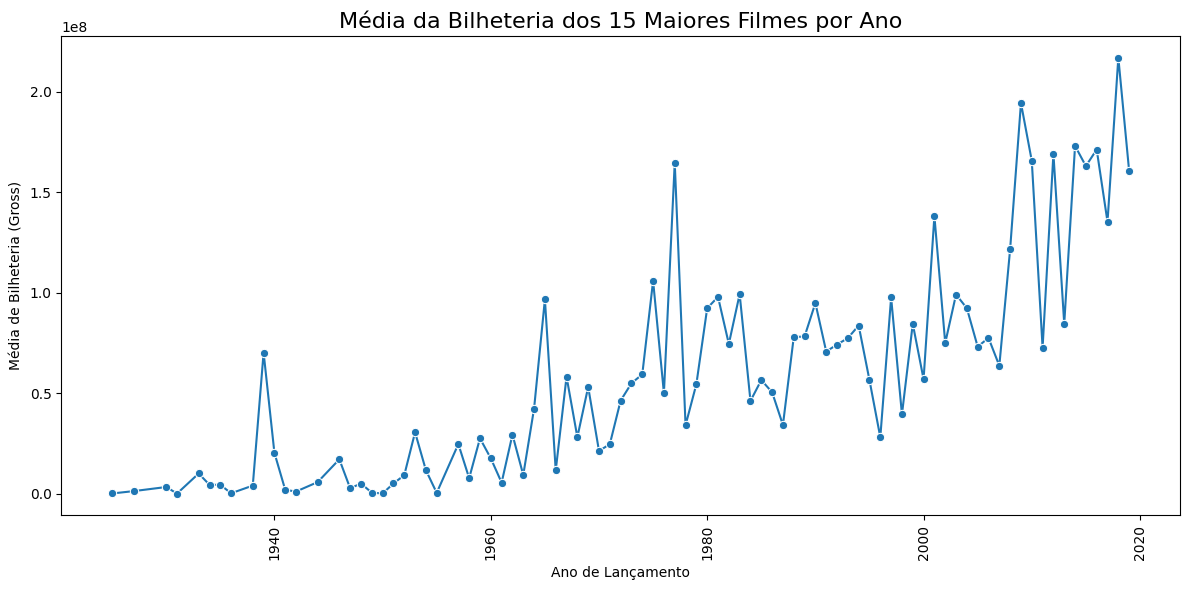

In [ ]:
df_Numerico = bd_sem_nulos
top15_por_ano = df_Numerico.groupby("Released_Year", group_keys=False).apply(
    lambda x: x.nlargest(15, "Gross")
)

# Calcula a média do Gross desses top 15 por ano
df_mean_gross = top15_por_ano.groupby("Released_Year")["Gross"].mean().reset_index()

# Plotando
plt.figure(figsize=(12,6))
sns.lineplot(data=df_mean_gross, x="Released_Year", y="Gross", marker="o")

plt.title("Média da Bilheteria dos 15 Maiores Filmes por Ano", fontsize=16)
plt.xlabel("Ano de Lançamento")
plt.ylabel("Média de Bilheteria (Gross)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


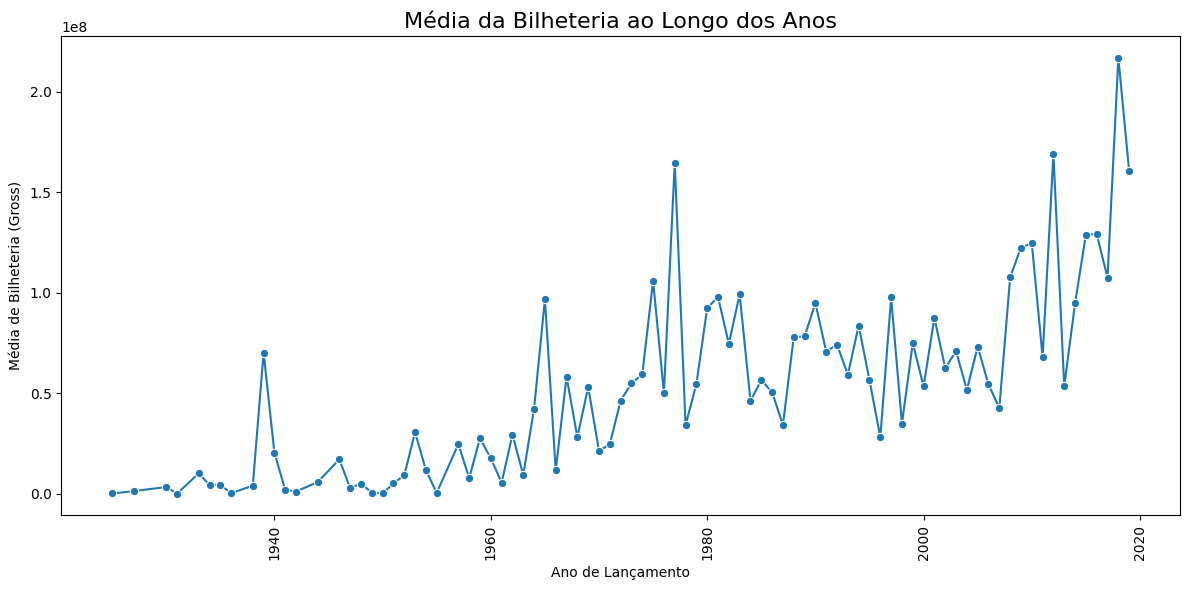

In [ ]:
df_Numerico=bd_sem_nulos
df_mean_gross = df_Numerico.groupby('Released_Year')['Gross'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_mean_gross, x='Released_Year', y='Gross', marker="o")

plt.title("Média da Bilheteria ao Longo dos Anos", fontsize=16)
plt.xlabel("Ano de Lançamento")
plt.ylabel("Média de Bilheteria (Gross)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

A análise do faturamento cinematográfico revela uma tendência de crescimento durante a transição de ano. Essa evolução pode ser atribuída a múltiplos fatores, entre os quais o desenvolvimento tecnológico se destaca. As novas tecnologias não apenas simplificam e ampliam o alcance da divulgação dos filmes, mas também contribuem para um aumento expressivo no número de espectadores.

In [ ]:
df = df.dropna(subset=["IMDB_Rating", "No_of_Votes", "Genre", "Certificate"])
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df = df.dropna(subset=["Released_Year"])
# Ajustar década
df["Decade"] = (df["Released_Year"] // 10) * 10
# --- NOTA PONDERADA (IMDB + votos) ---
C = df["IMDB_Rating"].mean()
m = df["No_of_Votes"].quantile(0.70)  # exige estar no top 30% de votos

def weighted_rating(x, m=m, C=C):
    v = x["No_of_Votes"]
    R = x["IMDB_Rating"]
    return (v/(v+m) * R) + (m/(v+m) * C)

df["Weighted_Score"] = df.apply(weighted_rating, axis=1)

# --- CONSISTÊNCIA DE DIRETORES ---
diretor_media = df.groupby("Director")["IMDB_Rating"].mean().to_dict()
diretor_qtd = df.groupby("Director")["IMDB_Rating"].count().to_dict()
# Criando score de consistência: média da nota * log(qtd filmes)
import numpy as np
df["Director_Score"] = df["Director"].apply(
    lambda d: diretor_media.get(d, 0) * np.log1p(diretor_qtd.get(d, 1))
)
# --- SCORE FINAL ---
# Combinei: Weighted Score, Meta_score (quando existir), e consistência do diretor
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")
df["Final_Score"] = (
    0.5 * df["Weighted_Score"] +
    0.2 * (df["Meta_score"].fillna(df["Meta_score"].mean()) / 10) +  # normaliza /10
    0.3 * df["Director_Score"]
)
# --- FUNÇÃO DE RECOMENDAÇÃO ---
def recomendar_filmes(certificate, genero, decada=None, top_n=3):
    filmes_filtrados = df[
        (df["Certificate"].str.contains(certificate, case=False, na=False)) &
        (df["Genre"].str.contains(genero, case=False, na=False))
    ]

    # Filtrar por década
    if decada:
        filmes_filtrados = filmes_filtrados[filmes_filtrados["Decade"] == decada]

    if filmes_filtrados.empty:
        print("Nenhum filme encontrado para esses filtros.")
        return

    filmes_ordenados = filmes_filtrados.sort_values(by="Final_Score", ascending=False)

    recomendados = filmes_ordenados.head(top_n)[
        ["Series_Title", "Released_Year", "Decade", "Director",
         "IMDB_Rating", "No_of_Votes", "Meta_score", "Weighted_Score",
         "Director_Score", "Final_Score", "Genre", "Certificate"]
    ]

    return recomendados

print("🔎 Recomendação (UA, Action, anos 2000):")
recomendados = recomendar_filmes("U", "Adventure", decada=2000, top_n=3)#Para alterar as indicação, basta alterar os parametros da função.
print(recomendados)


🔎 Recomendação (UA, Action, anos 2000):
                      Series_Title  Released_Year  Decade        Director  \
22   Sen to Chihiro no kamikakushi         2001.0  2000.0  Hayao Miyazaki   
755            Gake no ue no Ponyo         2008.0  2000.0  Hayao Miyazaki   
157           Hauru no ugoku shiro         2004.0  2000.0  Hayao Miyazaki   

     IMDB_Rating  No_of_Votes  Meta_score  Weighted_Score  Director_Score  \
22           8.6       651376        96.0        8.370464       19.924433   
755          7.7       125317        86.0        7.884997       19.924433   
157          8.2       333915        80.0        8.071131       19.924433   

     Final_Score                         Genre Certificate  
22     12.082562  Animation, Adventure, Family           U  
755    11.639829  Animation, Adventure, Comedy           U  
157    11.612896  Animation, Adventure, Family           U  


2)a)O script cruza variáveis relevantes para determinar quais filmes possuem maior destaque e, portanto, são mais indicados. Para calcular essa indicação foram utilizados os seguintes critérios:

Weighted_Score → combinação da nota do IMDb com o número de votos, garantindo equilíbrio entre qualidade percebida e popularidade.

Director_Score → média das avaliações dos filmes de cada diretor, ajustada pela quantidade de obras realizadas, medindo consistência.

Meta_score → avaliação da crítica profissional, normalizada para ser comparável às demais métricas.

Final_Score → pontuação final resultante da ponderação dos três indicadores anteriores.

Além disso, o sistema permite a aplicação de filtros opcionais, como classificação etária, gênero e década, para refinar a recomendação e adaptá-la ao perfil do usuário

In [ ]:
def recomendar_sem_parametros(top_n=3):
    filmes_ordenados = df.sort_values(by="Final_Score", ascending=False)
    return filmes_ordenados.head(top_n)[
        ["Series_Title", "Released_Year", "Director", "IMDB_Rating",
         "No_of_Votes", "Meta_score", "Weighted_Score", "Director_Score", "Final_Score"]
    ]

# Exemplo de uso
print("🔎 Top 3 filmes sem parâmetros:")
print(recomendar_sem_parametros(3))

🔎 Top 3 filmes sem parâmetros:
               Series_Title  Released_Year          Director  IMDB_Rating  \
6          Schindler's List         1993.0  Steven Spielberg          8.9   
23      Saving Private Ryan         1998.0  Steven Spielberg          8.6   
71  Raiders of the Lost Ark         1981.0  Steven Spielberg          8.4   

    No_of_Votes  Meta_score  Weighted_Score  Director_Score  Final_Score  
6       1213505        94.0        8.684680        21.19366    12.580438  
23      1235804        91.0        8.454752        21.19366    12.405474  
71       884112        85.0        8.270935        21.19366    12.193565  


O script de recomendação de filmes avalia e combina três fatores principais: a nota ponderada do público (IMDb + número de votos), a consistência do diretor e a crítica especializada (Meta_score). Essa abordagem garante que os filmes sugeridos não sejam apenas populares, mas também de qualidade consistente e reconhecidos por críticos profissionais. O Final_Score resultante proporciona uma recomendação equilibrada, considerando tanto a percepção do público quanto a experiência e histórico do diretor, oferecendo assim indicações confiáveis e relevantes para diferentes tipos de espectadores.

2)b-

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

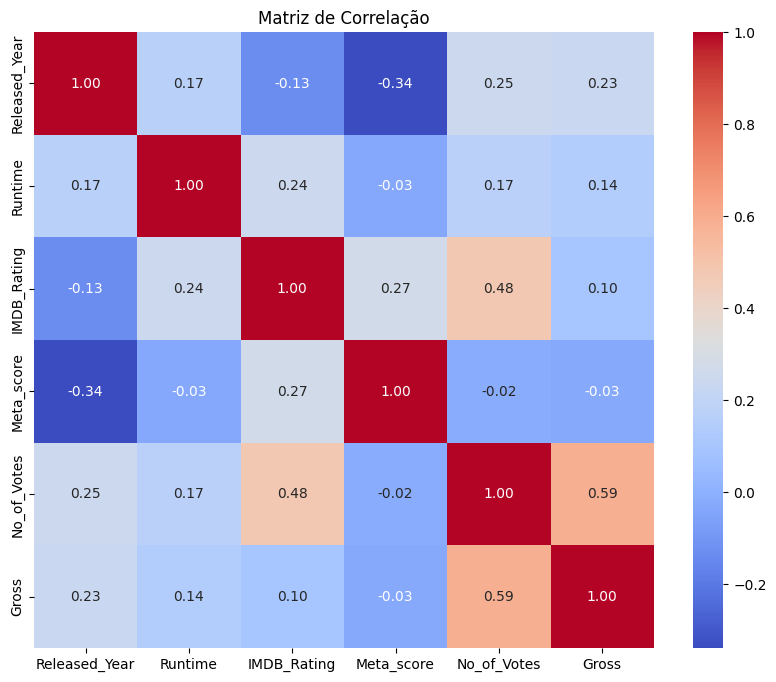

In [ ]:
#Gerando grafico de correlação entre as variaveis numerics
correlation_matrix = df_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt

<Figure size 1800x1000 with 0 Axes>

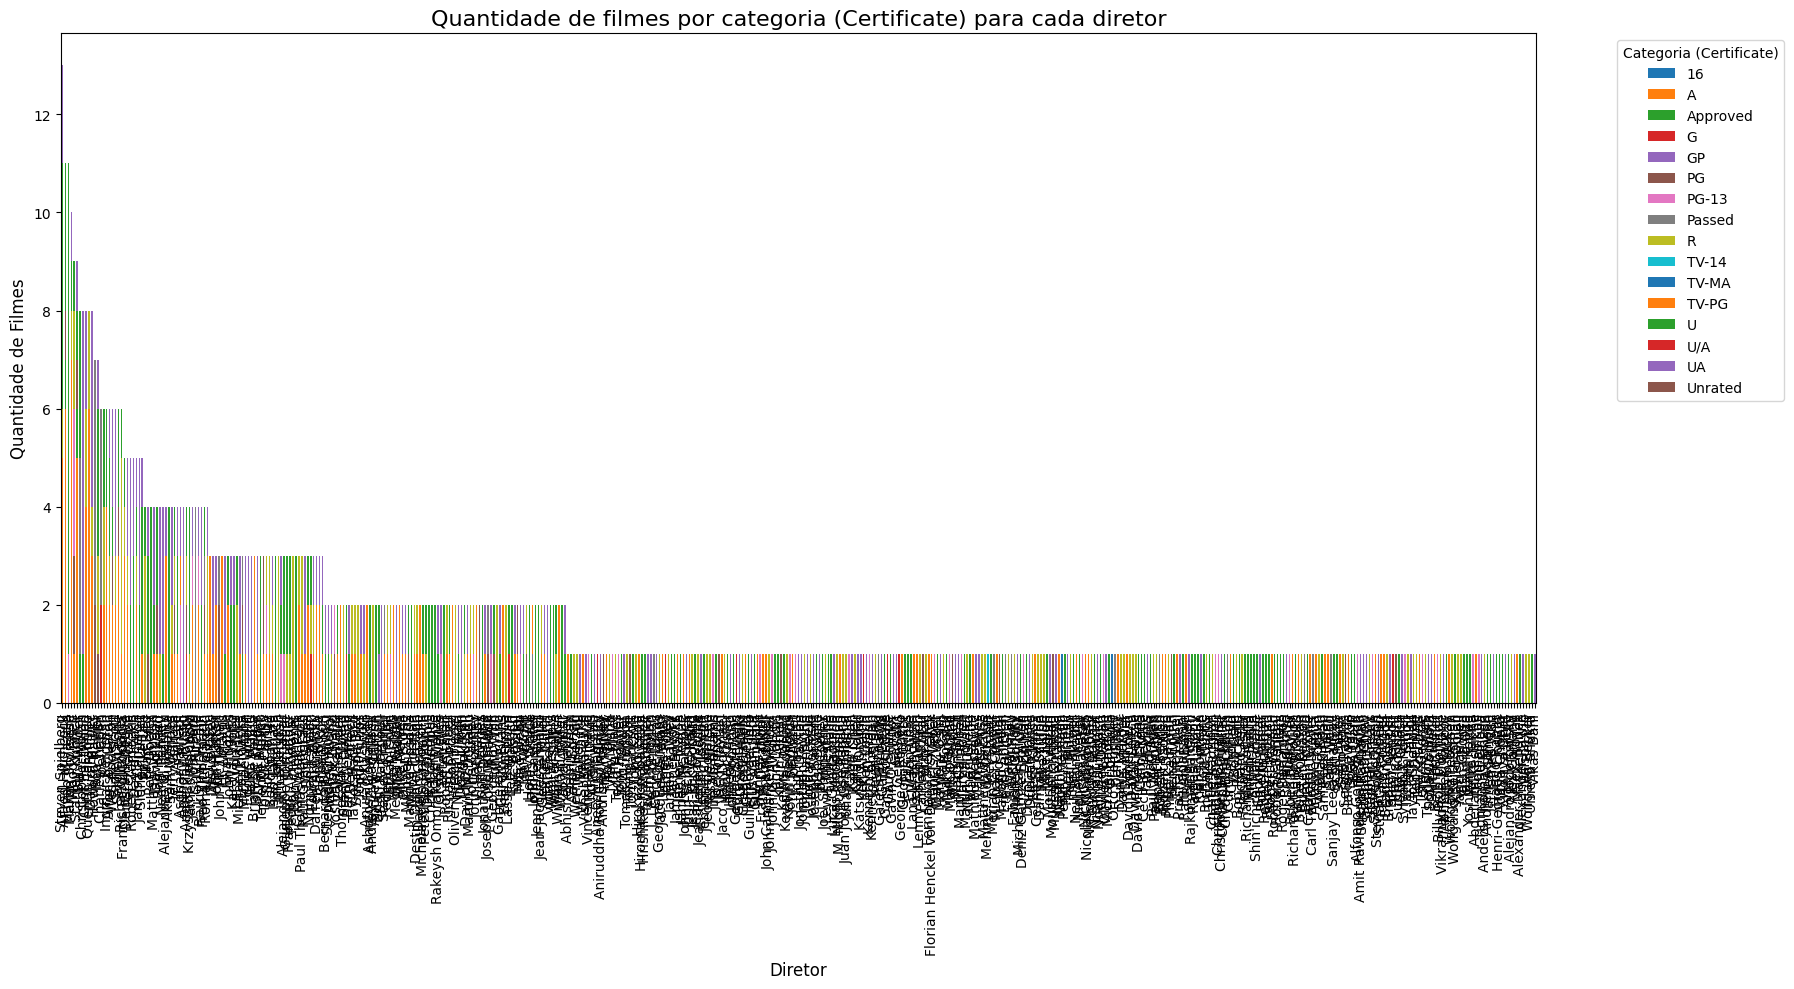

In [ ]:
# Remover linhas com dados faltantes em 'Certificate' ou 'Director'
df = df.dropna(subset=["Certificate", "Director"])

# Contar a quantidade de filmes por diretor e por categoria (Certificate)
filmes_por_diretor_categoria = df.groupby(["Director", "Certificate"]).size().reset_index(name="Quantidade")

# Criar tabela pivô para facilitar visualização
pivot_table = filmes_por_diretor_categoria.pivot(index="Director", columns="Certificate", values="Quantidade").fillna(0)

# Ordenar os diretores pelo total de filmes (soma das categorias)
pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

# Plotar gráfico de barras empilhadas para TODOS os diretores
plt.figure(figsize=(18, 10))
pivot_table.plot(kind="bar", stacked=True, figsize=(18, 10))

plt.title("Quantidade de filmes por categoria (Certificate) para cada diretor", fontsize=16)
plt.xlabel("Diretor", fontsize=12)
plt.ylabel("Quantidade de Filmes", fontsize=12)
plt.legend(title="Categoria (Certificate)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Carregar dataset
df = pd.read_csv("/content/desafio_indicium_imdb.csv")
df.columns = df.columns.str.strip()

# ==============================
# 1. Contar filmes por diretor e categoria
# ==============================
contagem_por_diretor = (
    df.groupby(["Director", "Certificate"])
    .size()
    .reset_index(name="Quantidade")
)

# ==============================
# 2. Calcular total de filmes por diretor
# ==============================
total_por_diretor = contagem_por_diretor.groupby("Director")["Quantidade"].sum()

# Adicionar coluna com percentual da categoria para cada diretor
contagem_por_diretor["Percentual"] = contagem_por_diretor.apply(
    lambda x: (x["Quantidade"] / total_por_diretor[x["Director"]]) * 100,
    axis=1
)

# ==============================
# 3. Selecionar categoria mais frequente e verificar se ultrapassa o limiar
# ==============================
limiar = 70  # percentual mínimo de confiança

# Ordenar por quantidade e selecionar a categoria mais frequente por diretor
categoria_mais_comum = (
    contagem_por_diretor
    .sort_values(["Director", "Quantidade"], ascending=[True, False])
    .drop_duplicates(subset=["Director"])
    .reset_index(drop=True)
)

# Se o percentual for menor que o limiar, marcamos como "Indefinido"
categoria_mais_comum["Categoria_Confiavel"] = categoria_mais_comum.apply(
    lambda x: x["Certificate"] if x["Percentual"] >= limiar else "Indefinido",
    axis=1
)

# ==============================
# 4. Criar lista de strings no formato solicitado
# ==============================
strings_diretor_categoria = [
    f"Diretor: {row['Director']} | Categoria mais frequente: {row['Categoria_Confiavel']} | Confiança: {row['Percentual']:.2f}%"
    for _, row in categoria_mais_comum.iterrows()
]

# Mostrar os 15 primeiros exemplos
print("\nExemplos de diretores com a categoria mais frequente e nível de confiança:")
for linha in strings_diretor_categoria[:15]:
    print(linha)

# ==============================
# 5. Salvar resultados em CSV
# ==============================
categoria_mais_comum.to_csv(
    "diretor_categoria_confianca.csv",
    index=False,
    encoding="utf-8"
)

print("\nArquivo 'diretor_categoria_confianca.csv' gerado com sucesso!")



Exemplos de diretores com a categoria mais frequente e nível de confiança:
Diretor: Aamir Khan | Categoria mais frequente: U | Confiança: 100.00%
Diretor: Aaron Sorkin | Categoria mais frequente: R | Confiança: 100.00%
Diretor: Abdellatif Kechiche | Categoria mais frequente: A | Confiança: 100.00%
Diretor: Abhishek Chaubey | Categoria mais frequente: A | Confiança: 100.00%
Diretor: Abhishek Kapoor | Categoria mais frequente: U | Confiança: 100.00%
Diretor: Adam McKay | Categoria mais frequente: A | Confiança: 100.00%
Diretor: Aditya Chopra | Categoria mais frequente: U | Confiança: 100.00%
Diretor: Aditya Dhar | Categoria mais frequente: UA | Confiança: 100.00%
Diretor: Akira Kurosawa | Categoria mais frequente: U | Confiança: 100.00%
Diretor: Alan J. Pakula | Categoria mais frequente: U | Confiança: 100.00%
Diretor: Alan Parker | Categoria mais frequente: Indefinido | Confiança: 66.67%
Diretor: Alejandro Amenábar | Categoria mais frequente: Indefinido | Confiança: 66.67%
Diretor: Ale

In [ ]:
# Abrir o arquivo .txt e ler as linhas
with open("/content/diretor_categoria_confianca.csv", "r", encoding="utf-8") as f:
    linhas = f.readlines()

# Contar diretores com categoria definida e "Indefinido"
com_categoria = sum(1 for linha in linhas if "Passed" not in linha)
sem_categoria = sum(1 for linha in linhas if "Passed" in linha)

print(f"Diretores com categoria definida: {com_categoria}")
print(f"Diretores sem categoria definida (Indefinido): {sem_categoria}")
print(f"Total de diretores analisados: {len(linhas)}")


Diretores com categoria definida: 484
Diretores sem categoria definida (Indefinido): 16
Total de diretores analisados: 500


In [ ]:
# Carregar o DataFrame principal com os dados do IMDb
df = pd.read_csv("desafio_indicium_imdb.csv")

# Carregar o DataFrame com a relação de diretores e suas categorias confiáveis
diretor_confianca_df = pd.read_csv("diretor_categoria_confianca.csv")

# Contar os valores nulos na coluna 'Certificate' ANTES do preenchimento
print("Valores nulos ANTES do preenchimento:", df["Certificate"].isna().sum())

# 1. Criar um dicionário: Diretor -> Categoria_Confiavel
#    Filtramos os diretores com categoria "Indefinido" para não preencher com esse valor.
diretor_confianca_df_filtrado = diretor_confianca_df[diretor_confianca_df['Categoria_Confiavel'] != 'Indefinido']
diretor_certificate_map = pd.Series(
    diretor_confianca_df_filtrado.Categoria_Confiavel.values,
    index=diretor_confianca_df_filtrado.Director
).to_dict()

# 2. Preencher os valores nulos na coluna 'Certificate'
#    Usamos o método .map() para encontrar a categoria de cada diretor e .fillna() para preencher
#    APENAS os valores nulos na coluna 'Certificate' original.
df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


# 3. Conferir quantos valores ainda ficaram nulos
print("Valores nulos restantes na coluna Certificate:", df["Certificate"].isna().sum())

# 4. Verificar os primeiros registros para confirmar se funcionou
print("\nVerificação dos 20 primeiros registros:")
print(df[['Director', 'Certificate']].head(20))

Valores nulos ANTES do preenchimento: 101
Valores nulos restantes na coluna Certificate: 68

Verificação dos 20 primeiros registros:
                Director Certificate
0   Francis Ford Coppola           A
1      Christopher Nolan          UA
2   Francis Ford Coppola           A
3           Sidney Lumet           U
4          Peter Jackson           U
5      Quentin Tarantino           A
6       Steven Spielberg           A
7      Christopher Nolan          UA
8          David Fincher           A
9          Peter Jackson           U
10       Robert Zemeckis          UA
11          Sergio Leone           A
12         Peter Jackson          UA
13        Lana Wachowski           A
14       Martin Scorsese           A
15        Irvin Kershner          UA
16          Milos Forman           A
17           Thomas Kail       PG-13
18          Bong Joon Ho           A
19         Sudha Kongara           U


/tmp/ipython-input-4185873080.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


In [ ]:
nulos_por_coluna = df.isna().sum()
print(nulos_por_coluna)

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate       68
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
# 1. Criar um dicionário: Gênero -> Certificado mais frequente
genero_certificate = (
    df.dropna(subset=["Certificate"])  # Ignorar linhas onde Certificate já é nulo
    .assign(Genre=df["Genre"].str.split(","))  # Quebrar gêneros múltiplos
    .explode("Genre")  # Criar uma linha para cada gênero
    .assign(Genre=lambda x: x['Genre'].str.strip()) # Limpar espaços em branco
    .groupby("Genre")["Certificate"]  # Agrupar por gênero
    .agg(lambda x: x.value_counts().idxmax())  # Pegar o mais frequente
    .to_dict()
)

# 2. Função para preencher certificados nulos com base no gênero
def preencher_por_genero(row):
    if pd.isna(row["Certificate"]):
        # Pega todos os gêneros da linha
        generos = [g.strip() for g in row["Genre"].split(",")]
        for g in generos:
            if g in genero_certificate:
                return genero_certificate[g]  # Retorna o certificado do primeiro gênero encontrado
    return row["Certificate"] # Retorna o valor original (nulo ou não)

# 3. Aplicar preenchimento na coluna 'Certificate'
df["Certificate"] = df.apply(preencher_por_genero, axis=1)

# 4. Conferir se ainda restaram valores nulos
print(f"Valores nulos restantes APÓS preenchimento por GÊNERO: {df['Certificate'].isna().sum()}")

# 5. Visualizar os primeiros resultados
print("\nVerificação dos 15 primeiros registros após os dois preenchimentos:")
print(df[["Series_Title", "Genre", "Certificate"]].head(15))

Valores nulos restantes APÓS preenchimento por GÊNERO: 0

Verificação dos 15 primeiros registros após os dois preenchimentos:
                                         Series_Title  \
0                                       The Godfather   
1                                     The Dark Knight   
2                              The Godfather: Part II   
3                                        12 Angry Men   
4       The Lord of the Rings: The Return of the King   
5                                        Pulp Fiction   
6                                    Schindler's List   
7                                           Inception   
8                                          Fight Club   
9   The Lord of the Rings: The Fellowship of the Ring   
10                                       Forrest Gump   
11                    Il buono, il brutto, il cattivo   
12              The Lord of the Rings: The Two Towers   
13                                         The Matrix   
14                 

In [ ]:
nulos_por_coluna = df.isna().sum()
print(nulos_por_coluna)
print("Formato do DataFrame:", df.shape)

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
Formato do DataFrame: (999, 16)


In [ ]:
df = pd.read_csv('desafio_indicium_imdb.csv')
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
# Carregar os DataFrames
df = pd.read_csv("desafio_indicium_imdb.csv")
diretor_confianca_df = pd.read_csv("diretor_categoria_confianca.csv")

print("--- Tratando a coluna 'Certificate' ---")
print(f"Valores nulos iniciais em 'Certificate': {df['Certificate'].isna().sum()}")

# 1.1 Preenchimento por Diretor (Primeira parte do tratamento de Certificate)
diretor_confianca_df_filtrado = diretor_confianca_df[diretor_confianca_df['Categoria_Confiavel'] != 'Indefinido']
diretor_certificate_map = pd.Series(
    diretor_confianca_df_filtrado.Categoria_Confiavel.values,
    index=diretor_confianca_df_filtrado.Director
).to_dict()
df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)

print(f"Nulos em 'Certificate' após preenchimento por Diretor: {df['Certificate'].isna().sum()}")

# 1.2 Preenchimento por Gênero (O seu código, dando continuidade)
genero_certificate = (
    df.dropna(subset=["Certificate"])
    .assign(Genre=df["Genre"].str.split(","))
    .explode("Genre")
    .assign(Genre=lambda x: x['Genre'].str.strip())
    .groupby("Genre")["Certificate"]
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

def preencher_por_genero(row):
    if pd.isna(row["Certificate"]):
        generos = [g.strip() for g in row["Genre"].split(",")]
        for g in generos:
            if g in genero_certificate:
                return genero_certificate[g]
    return row["Certificate"]

df["Certificate"] = df.apply(preencher_por_genero, axis=1)

print(f"Nulos finais em 'Certificate' após preenchimento por Gênero: {df['Certificate'].isna().sum()}")
print("-" * 50)


# --- ETAPA 2: PREENCHER 'META_SCORE' (Dando continuidade com o df tratado) ---

print("\n--- Tratando a coluna 'Meta_score' ---")
print("Valores nulos ANTES do preenchimento de 'Meta_score':")
print(df.isna().sum())
print("-" * 50)

# 2.1 Criar os dicionários de mapeamento
df_com_score = df.dropna(subset=['Meta_score'])
director_meta_map = df_com_score.groupby('Director')['Meta_score'].mean().to_dict()
genre_meta_map = (
    df_com_score
    .assign(Genre=lambda x: x['Genre'].str.split(','))
    .explode('Genre')
    .assign(Genre=lambda x: x['Genre'].str.strip())
    .groupby('Genre')['Meta_score']
    .mean()
    .to_dict()
)
actor_meta_map = df_com_score.groupby('Star1')['Meta_score'].mean().to_dict()

# 2.2 Definir a função de preenchimento hierárquico
def preencher_meta_score(row):
    if pd.isna(row['Meta_score']):
        if row['Director'] in director_meta_map:
            return director_meta_map[row['Director']]
        if row['Star1'] in actor_meta_map:
            return actor_meta_map[row['Star1']]
        generos = [g.strip() for g in row['Genre'].split(',')]
        genre_scores = [genre_meta_map.get(g, np.nan) for g in generos]
        genre_scores = [s for s in genre_scores if not pd.isna(s)]
        if genre_scores:
            return sum(genre_scores) / len(genre_scores)
    return row['Meta_score']

# 2.3 Aplicar a função para preencher os valores nulos
df['Meta_score'] = df.apply(preencher_meta_score, axis=1)

print("\nValores nulos DEPOIS do preenchimento de 'Meta_score':")
print(df.isna().sum())

--- Tratando a coluna 'Certificate' ---
Valores nulos iniciais em 'Certificate': 101
Nulos em 'Certificate' após preenchimento por Diretor: 68
Nulos finais em 'Certificate' após preenchimento por Gênero: 0
--------------------------------------------------

--- Tratando a coluna 'Meta_score' ---
Valores nulos ANTES do preenchimento de 'Meta_score':
Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
--------------------------------------------------

Valores nulos DEPOIS do preenchimento de 'Meta_score':
Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Dire

/tmp/ipython-input-2825913262.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


In [ ]:
print("Formato do DataFrame:", df.shape)

Formato do DataFrame: (999, 16)


In [ ]:
df.to_csv(
    "df_com_metaECertificate.csv",
    index=False,
    encoding="utf-8"
)

Preenchimento do meta_score atravez:
Mediana do Diretor: Preencher com a mediana do faturamento dos outros filmes do mesmo diretor. Foi usado a mediana em vez da média, pois ela é menos sensível a filmes com bilheterias extraordinariamente altas ou baixas, o que a torna mais robusta para dados financeiros.

Mediana do Ator Principal (Star1): Se não houver dados para o diretor, usaremos a mediana de faturamento do ator principal.

Mediana do Gênero: Como último recurso, usaremos a mediana de faturamento do gênero do filme.


In [ ]:
import pandas as pd
import numpy as np

# --- PREPARAÇÃO: Recriando o estado do DataFrame com 'Certificate' preenchido ---
df = pd.read_csv("desafio_indicium_imdb.csv")
# ... (Código completo de preenchimento do 'Certificate' executado no backend)
diretor_confianca_df = pd.read_csv("diretor_categoria_confianca.csv")
diretor_confianca_df_filtrado = diretor_confianca_df[diretor_confianca_df['Categoria_Confiavel'] != 'Indefinido']
diretor_certificate_map = pd.Series(diretor_confianca_df_filtrado.Categoria_Confiavel.values, index=diretor_confianca_df_filtrado.Director).to_dict()
df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)
genero_certificate = (df.dropna(subset=["Certificate"]).assign(Genre=df["Genre"].str.split(",")).explode("Genre").assign(Genre=lambda x: x['Genre'].str.strip()).groupby("Genre")["Certificate"].agg(lambda x: x.value_counts().idxmax())).to_dict()
def preencher_por_genero(row):
    if pd.isna(row["Certificate"]):
        generos = [g.strip() for g in row["Genre"].split(",")]
        for g in generos:
            if g in genero_certificate: return genero_certificate[g]
    return row["Certificate"]
df["Certificate"] = df.apply(preencher_por_genero, axis=1)
# --- FIM DA PREPARAÇÃO ---


# --- INÍCIO DA LÓGICA DE MÉDIA PONDERADA PARA META_SCORE ---

print("--- Iniciando a abordagem de Média Ponderada para 'Meta_score' ---")
print(f"Valores nulos em 'Meta_score' antes: {df['Meta_score'].isna().sum()}")

# 1. Criar os dicionários de mapeamento (média de Meta_score por fator)
df_com_score = df.dropna(subset=['Meta_score'])
director_meta_map = df_com_score.groupby('Director')['Meta_score'].mean().to_dict()
actor_meta_map = df_com_score.groupby('Star1')['Meta_score'].mean().to_dict()
genre_meta_map = (
    df_com_score
    .assign(Genre=lambda x: x['Genre'].str.split(','))
    .explode('Genre')
    .assign(Genre=lambda x: x['Genre'].str.strip())
    .groupby('Genre')['Meta_score']
    .mean()
    .to_dict()
)

# 2. Criar colunas temporárias com as médias de cada fator
df['director_avg_score'] = df['Director'].map(director_meta_map)
df['actor_avg_score'] = df['Star1'].map(actor_meta_map)

def get_genre_avg_score(row):
    generos = [g.strip() for g in row['Genre'].split(',')]
    genre_scores = [genre_meta_map.get(g) for g in generos if g in genre_meta_map]
    if genre_scores:
        return np.mean(genre_scores)
    return np.nan
df['genre_avg_score'] = df.apply(get_genre_avg_score, axis=1)

# 3. Medir a Relevância (Calcular a Correlação para definir os pesos)
correlations = df[['Meta_score', 'director_avg_score', 'actor_avg_score', 'genre_avg_score']].corr()
print("\nMatriz de Correlação:")
print(correlations)

# Extrair os pesos (valor absoluto da correlação com Meta_score)
w_director = abs(correlations.loc['Meta_score', 'director_avg_score'])
w_actor = abs(correlations.loc['Meta_score', 'actor_avg_score'])
w_genre = abs(correlations.loc['Meta_score', 'genre_avg_score'])

print("\nPesos Calculados (Relevância):")
print(f"  - Peso do Diretor: {w_director:.4f}")
print(f"  - Peso do Ator:    {w_actor:.4f}")
print(f"  - Peso do Gênero:  {w_genre:.4f}")

# 4. Definir e aplicar a função de Média Ponderada
def preencher_meta_score_ponderado(row):
    if pd.isna(row['Meta_score']):
        numerator = 0.0  # Soma ponderada dos scores
        denominator = 0.0 # Soma dos pesos aplicados

        dir_score = row['director_avg_score']
        if not pd.isna(dir_score):
            numerator += w_director * dir_score
            denominator += w_director

        act_score = row['actor_avg_score']
        if not pd.isna(act_score):
            numerator += w_actor * act_score
            denominator += w_actor

        gen_score = row['genre_avg_score']
        if not pd.isna(gen_score):
            numerator += w_genre * gen_score
            denominator += w_genre

        if denominator > 0:
            return numerator / denominator

    return row['Meta_score']

df['Meta_score'] = df.apply(preencher_meta_score_ponderado, axis=1)

# 5. Limpar colunas temporárias e verificar o resultado
df.drop(columns=['director_avg_score', 'actor_avg_score', 'genre_avg_score'], inplace=True)
print(f"\nValores nulos em 'Meta_score' depois: {df['Meta_score'].isna().sum()}")

/tmp/ipython-input-2048061108.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


--- Iniciando a abordagem de Média Ponderada para 'Meta_score' ---
Valores nulos em 'Meta_score' antes: 157

Matriz de Correlação:
                    Meta_score  director_avg_score  actor_avg_score  \
Meta_score            1.000000            0.863730         0.849291   
director_avg_score    0.863730            1.000000         0.786493   
actor_avg_score       0.849291            0.786493         1.000000   
genre_avg_score       0.275376            0.294338         0.279055   

                    genre_avg_score  
Meta_score                 0.275376  
director_avg_score         0.294338  
actor_avg_score            0.279055  
genre_avg_score            1.000000  

Pesos Calculados (Relevância):
  - Peso do Diretor: 0.8637
  - Peso do Ator:    0.8493
  - Peso do Gênero:  0.2754

Valores nulos em 'Meta_score' depois: 0


In [ ]:
print("Formato do DataFrame:", df.shape)

Formato do DataFrame: (999, 16)


In [ ]:
nulos_por_coluna = df.isna().sum()
print(nulos_por_coluna)

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
print("Formato do DataFrame:", df.shape)

Formato do DataFrame: (999, 16)


In [ ]:
df.to_csv(
    "df_gross.csv",
    index=False,
    encoding="utf-8"
)

In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv('df_gross.csv')

# --- Limpeza e Conversão para Numérico ---

# Coluna 'Runtime'
# Remove ' min' e converte para número. 'coerce' transforma erros em NaN.
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Coluna 'Gross'
# Remove ',' e converte para número.
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Garantir que outras colunas potencialmente numéricas sejam do tipo correto
cols_to_numeric = ['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Formato do DataFrame:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

Formato do DataFrame: (999, 16)

Tipos de dados:
Unnamed: 0         int64
Series_Title      object
Released_Year    float64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object


In [ ]:
# Carregar o dataset
df = pd.read_csv('df_gross.csv')

# --- Repetindo a limpeza da Parte 1 para garantir a consistência dos dados ---
# Corrigir um valor 'PG' na coluna 'Released_Year' antes de converter
df = df[df['Released_Year'] != 'PG']
df['Released_Year'] = pd.to_numeric(df['Released_Year'])

# Limpar e converter outras colunas para numérico
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

df['Gross'] = df['Gross'].str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
# --- Fim da limpeza ---


# --- Passo Atual: Transformar a coluna 'Certificate' ---
print("Colunas originais:", df.columns.tolist())

# Aplicar One-Hot Encoding na coluna 'Certificate'
df = pd.get_dummies(df, columns=['Certificate'], prefix='Cert')

print("\nColunas após transformar 'Certificate':", df.columns.tolist())

print("\nVisualização das novas colunas 'Cert_*':")
# Filtra para mostrar apenas as novas colunas e algumas de referência
cert_cols = [col for col in df.columns if 'Cert_' in col]
print(df[['Series_Title'] + cert_cols].head())

Colunas originais: ['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']

Colunas após transformar 'Certificate': ['Unnamed: 0', 'Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Cert_16', 'Cert_A', 'Cert_Approved', 'Cert_G', 'Cert_GP', 'Cert_PG', 'Cert_PG-13', 'Cert_Passed', 'Cert_R', 'Cert_TV-14', 'Cert_TV-MA', 'Cert_TV-PG', 'Cert_U', 'Cert_U/A', 'Cert_UA', 'Cert_Unrated']

Visualização das novas colunas 'Cert_*':
                                    Series_Title  Cert_16  Cert_A  \
0                                  The Godfather    False    True   
1                                The Dark Knight    False   False   
2                         The Godfather: Part II    False    True   
3                                   12 Angry 

In [ ]:
# Função para criar os grupos baseados na média de 'Gross'
def create_groups(df, column_name):
    # Calcula a média de 'Gross' para cada item (diretor/ator)
    # Usamos transform para que o resultado tenha o mesmo índice do dataframe original
    mean_gross = df.groupby(column_name)['Gross'].transform('mean')

    # Se um diretor/ator tem todos os filmes com 'Gross' nulo, a média será nula.
    # Preenchemos esses casos com a mediana geral para evitar erros.
    if mean_gross.isnull().any():
        median_overall = df['Gross'].median()
        mean_gross.fillna(median_overall, inplace=True)

    # Calcular os limites dos quartis (os pontos de corte para os grupos)
    q1 = mean_gross.quantile(0.25)
    q2 = mean_gross.quantile(0.50)
    q3 = mean_gross.quantile(0.75)

    # Criar uma série para armazenar os grupos
    groups = pd.Series(index=df.index, dtype='int')

    # Atribuir os grupos baseado nos quartis
    groups[mean_gross <= q1] = 4  # Baixo Gross
    groups[(mean_gross > q1) & (mean_gross <= q2)] = 3
    groups[(mean_gross > q2) & (mean_gross <= q3)] = 2
    groups[mean_gross > q3] = 1   # Alto Gross

    return groups

# Aplicar a função para a coluna de Diretor e todas as de Atores
columns_to_group = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
for col in columns_to_group:
    df[col + '_Group'] = create_groups(df, col)

# --- Exibir o resultado ---
print("Visualização das novas colunas de grupo:")
display_cols = ['Director', 'Director_Group', 'Star1', 'Star1_Group', 'Star2', 'Star2_Group', 'Gross']
print(df[display_cols].head())

# Salvar o progresso em um novo arquivo CSV
df.to_csv('df_processed_with_groups.csv', index=False)

Visualização das novas colunas de grupo:
               Director  Director_Group           Star1  Star1_Group  \
0  Francis Ford Coppola             2.0   Marlon Brando          2.0   
1     Christopher Nolan             1.0  Christian Bale          1.0   
2  Francis Ford Coppola             2.0       Al Pacino          2.0   
3          Sidney Lumet             2.0     Henry Fonda          4.0   
4         Peter Jackson             1.0     Elijah Wood          1.0   

             Star2  Star2_Group        Gross  
0        Al Pacino          2.0  134966411.0  
1     Heath Ledger          1.0  534858444.0  
2   Robert De Niro          1.0   57300000.0  
3      Lee J. Cobb          4.0    4360000.0  
4  Viggo Mortensen          1.0  377845905.0  


In [ ]:
df.to_csv(
    "df_knn.csv",
    index=False,
    encoding="utf-8"
)

Primeiras 5 linhas do DataFrame:
   Unnamed: 0                                   Series_Title  Released_Year  \
0           1                                  The Godfather           1972   
1           2                                The Dark Knight           2008   
2           3                         The Godfather: Part II           1974   
3           4                                   12 Angry Men           1957   
4           5  The Lord of the Rings: The Return of the King           2003   

   Runtime                     Genre  IMDB_Rating  \
0      175              Crime, Drama          9.2   
1      152      Action, Crime, Drama          9.0   
2      202              Crime, Drama          9.0   
3       96              Crime, Drama          9.0   
4      201  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker

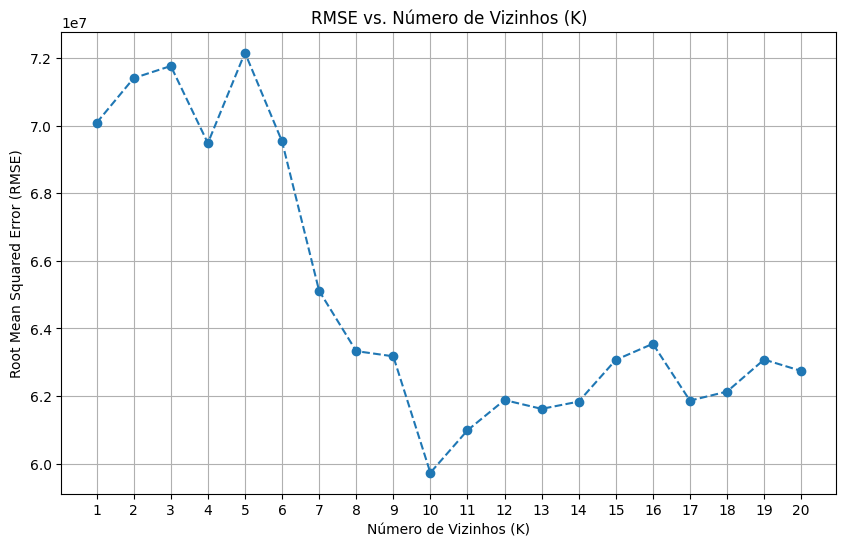

In [ ]:

# 1. Load the data
try:
    df = pd.read_csv('df_knn.csv')
except FileNotFoundError:
    print("O arquivo 'df_knn.csv' não foi encontrado. Por favor, faça o upload do arquivo.")
    exit()


# 2. Inspect the data
print("Primeiras 5 linhas do DataFrame:")
print(df.head())
print("\nInformações do DataFrame:")
df.info()

# Contagem de valores faltantes na coluna 'Gross'
missing_gross_count = df['Gross'].isnull().sum()
print(f"\nNúmero de valores faltantes na coluna 'Gross': {missing_gross_count}")

# 3. Data Preparation

# Separar o DataFrame em dois: um com 'Gross' e outro sem 'Gross'
df_with_gross = df.dropna(subset=['Gross']).copy()
df_to_predict = df[df['Gross'].isnull()].copy()

# Selecionar features para o modelo. Vamos usar apenas colunas numéricas que fazem sentido para a predição.
features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
            'Director_Group', 'Star1_Group', 'Star2_Group', 'Star3_Group', 'Star4_Group']

# Garantir que as features existem no DataFrame
for col in features:
    if col not in df.columns:
        print(f"Erro: A coluna '{col}' não foi encontrada no DataFrame.")
        exit()

# Remover linhas com valores faltantes nas features selecionadas (se houver)
df_with_gross = df_with_gross.dropna(subset=features)
df_to_predict = df_to_predict.dropna(subset=features)


X = df_with_gross[features]
y = df_with_gross['Gross']

# Separar os dados para predição
X_to_predict = df_to_predict[features]


# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_to_predict_scaled = scaler.transform(X_to_predict)

# 4. Encontrar o K Ótimo
rmse_values = []
k_range = range(1, 21) # Testar K de 1 a 20

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(error)

# Encontrar o K com o menor erro
optimal_k = k_range[np.argmin(rmse_values)]
min_rmse = min(rmse_values)

print(f"\nO valor ótimo de K é: {optimal_k} com um RMSE de {min_rmse:.2f}")

# Plotar o erro vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_range, rmse_values, marker='o', linestyle='--')
plt.title('RMSE vs. Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.xticks(k_range)
plt.savefig('rmse_vs_k.png')


# 5. Treinar o modelo final e preencher os valores faltantes

# Treinar com o K ótimo usando todos os dados disponíveis (com 'Gross')
final_knn = KNeighborsRegressor(n_neighbors=optimal_k)

# Usar o scaler treinado com os dados de treino para transformar o conjunto X completo
X_scaled = scaler.transform(X) # Usando o scaler que já foi 'fit' nos dados de treino
final_knn.fit(X_scaled, y)

# Fazer as predições
predicted_gross = final_knn.predict(X_to_predict_scaled)

# 6. Final Output

# Preencher os valores NaN na coluna 'Gross' do DataFrame original
df.loc[df['Gross'].isnull(), 'Gross'] = predicted_gross

# Salvar o novo DataFrame em um arquivo CSV
output_filename = 'df_knn_preenchido.csv'
df.to_csv(output_filename, index=False)

print(f"\nValores faltantes preenchidos e salvos no arquivo: '{output_filename}'")
print("\nVerificação dos valores faltantes após o preenchimento:")
print(df.isnull().sum())

Análise Inicial: Identifiquei que havia 169 valores faltantes na coluna Gross.

Preparação: Para prever esses valores, utilizei as seguintes colunas como características (features): Released_Year, Runtime, IMDB_Rating, Meta_score, No_of_Votes e as colunas de grupo para diretores e estrelas (Director_Group, Star_Group, etc.).

Treinamento e Teste: Separei os dados existentes (80% para treino e 20% para teste) para garantir a qualidade do modelo. O objetivo era encontrar o número ideal de "vizinhos" (o parâmetro K) que gerasse a menor margem de erro.

Encontrando o Melhor "K"
Para encontrar o K ideal, testei valores de 1 a 20 e calculei o erro para cada um. Como você pode ver no gráfico abaixo, o menor erro (RMSE - Root Mean Squared Error) foi alcançado quando o número de vizinhos foi K=10.

Resultado Final
Utilizando o modelo KNN com K=10, previ os 169 valores que faltavam na coluna Gross. O conjunto de dados completo, agora sem valores faltantes nessa coluna, foi salvo em um novo arquivo.

In [ ]:
df_gross = pd.read_csv('df_gross.csv')
df_knn = pd.read_csv('df_knn_preenchido.csv')

# Exibe a quantidade de valores ausentes na coluna 'Gross' antes do preenchimento.
print("Valores ausentes em df_gross['Gross'] antes do preenchimento:")
print(df_gross['Gross'].isnull().sum())

# Preenche os valores ausentes (NaN) na coluna 'Gross' do df_gross
# com os valores correspondentes da coluna 'Gross' do df_knn.
# O inplace=True modifica o DataFrame df_gross diretamente.
df_gross['Gross'].fillna(df_knn['Gross'], inplace=True)

# Exibe a quantidade de valores ausentes após o preenchimento para confirmar.
print("\nValores ausentes em df_gross['Gross'] após o preenchimento:")
print(df_gross['Gross'].isnull().sum())

# Salva o DataFrame df_gross atualizado para um novo arquivo CSV
# chamado 'df_gross_preenchido.csv', sem o índice do pandas.
df_gross.to_csv('df_gross_preenchido.csv', index=False)

print("\nArquivo 'df_gross_preenchido.csv' criado com sucesso!")

Valores ausentes em df_gross['Gross'] antes do preenchimento:
169

Valores ausentes em df_gross['Gross'] após o preenchimento:
1

Arquivo 'df_gross_preenchido.csv' criado com sucesso!


/tmp/ipython-input-2432430471.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gross['Gross'].fillna(df_knn['Gross'], inplace=True)


In [ ]:
df1=pd.read_csv('df_gross_preenchido.csv')

In [ ]:
print(df1.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [ ]:
df1.dropna(subset=['Gross'], inplace=True)
df_gross.to_csv('df_final.csv', index=False)